In [1]:
import os, os.path
import numpy as np
from time import time
import pandas as pd
import math as m
import setup_runs as sr
import importlib
import matplotlib.pyplot as plt
import itertools


In [84]:
arch = "Chile_sector_package_2021_03_25_tornado"
df_pmr = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch)#pd.read_csv(sr.fp_csv_output_multi_sector_pmr)
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch)
df_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch)
df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch)

#ms = set(df_mas[(df_mas["future_id"].isin([0])) & (df_mas["design_id"].isin([1, 3])) & (df_mas["strategy_id"].isin([0, 1]))]["master_id"])
ms = set(df_mas[(df_mas["strategy_id"].isin([0]))]["master_id"])
fs = set(df_fut[df_fut["sector"].isin(["electricity_generation"])]["future_id"])
ms = set(df_mas[(df_mas["future_id"].isin(fs))]["master_id"])
ms = ms | set({0})

if False:
    for m in list(ms):#df_pmr["master_id"].unique():


        df_now = df_pmr[df_pmr["master_id"] == m].sort_values(by = ["year"])

        x = np.array(df_now["year"])
        y = np.array(df_now["el-emissions_total-mtco2e"])

        if m == 0:
            plt.plot(x, y, color = "black", alpha = 1)
        else:
            plt.plot(x, y, alpha = 0.4)

    plt.show()


In [96]:
56*15

840

In [86]:
fields_merge = ["master_id", "year"]
df_full = pd.merge(df_an, df_py, how = "inner", on = fields_merge)
df_full = pd.merge(df_full, df_pmr, how = "inner", on = fields_merge)
df_full = df_full.sort_values(by = fields_merge).reset_index(drop = True)
fields_emit_total = [x for x in df_full.columns if "emissions_total" in x]

df_full["all-emissions_total-m2co2e"] = df_full[fields_emit_total].sum(axis = 1)


In [87]:
df_full[df_full["year"].isin([2050])][fields_merge + fields_emit_total + ["all-emissions_total-m2co2e"]]

master_id  year  ag-emissions_total-mtco2e  fo-emissions_total-mtco2e  \
33             0  2050                  10.594677                 -68.585232   
67             1  2050                  10.594677                 -68.585232   
101            2  2050                  10.594677                 -68.585232   
135            3  2050                  10.594677                 -68.585232   
169            4  2050                  10.594677                 -68.585232   
...          ...   ...                        ...                        ...   
11593        340  2050                  10.594677                 -68.585232   
11627        341  2050                  10.594677                 -68.585232   
11661        342  2050                  10.594677                 -68.585232   
11695        343  2050                  10.594677                 -68.585232   
11729        344  2050                  10.594677                 -68.585232   

       ip-emissions_total-mtco2e  wa-emissions_total-mtco2e  \
33                      5.771088                   6.998878   
67                      5.771088                   6.998878   
101                     5.771088                   6.998878   
135                     5.878867                   6.998878   
169                     5.663309                   6.998878   
...                          ...                        ...   
11593                   5.771088                   6.998878   
11627                   5.771088                   6.998878   
11661                   5.771088                   6.998878   
11695                   5.771088                   6.998878   
11729                   5.771088                   6.998878   

       co-emissions_total-mtco2e  im-emissions_total-mtco2e  \
33                      2.489349                  11.594513   
67                      2.489349                  11.615221   
101                     2.489349                  11.573805   
135                     2.489349                  11.615221   
169                     2.489349                  11.573805   
...                          ...                        ...   
11593                   2.489349                  11.594513   
11627                   2.489349                  11.594513   
11661                   2.489349                  11.594513   
11695                   2.489349                  11.594513   
11729                   2.489349                  11.594513   

       pu-emissions_total-mtco2e  re-emissions_total-mtco2e  \
33                      0.140599                   3.434118   
67                      0.140599                   3.434118   
101                     0.140599                   3.434118   
135                     0.140599                   3.434118   
169                     0.140599                   3.434118   
...                          ...                        ...   
11593                   0.140599                   3.434118   
11627                   0.140599                   3.434118   
11661                   0.140599                   3.434118   
11695                   0.140599                   3.434118   
11729                   0.140599                   3.434118   

       tx-emissions_total-mtco2e  el-emissions_total-mtco2e  \
33                     22.046686                       2.83   
67                     22.046686                       2.83   
101                    22.046686                       2.82   
135                    22.046686                       2.83   
169                    22.046686                       2.82   
...                          ...                        ...   
11593                  22.046686                       2.83   
11627                  22.046686                       2.83   
11661                  22.046686                       2.83   
11695                  22.046686                       2.83   
11729                  22.046686                       2.83   

       all-emissio

In [50]:
subsecs = ["im-", "re-", "tx-"]
df_py[df_py["master_id"].isin([0, 1, 2]) & df_py["year"].isin([2050])][["master_id"] + [x for x in df_py.columns if (x[0:3] in subsecs) and ("emissions" in x)]].transpose()

#
# copper emissions
# other industries
# residential emissions
# transport private emissions
#


35         71         107
master_id                              0.000000   1.000000   2.000000
im-emissions_cement-mtco2e             0.207077   0.227785   0.186370
im-emissions_copper-mtco2e             1.780160   1.609758   1.609758
im-emissions_fishing-mtco2e            0.739584   0.739584   0.739584
im-emissions_iron-mtco2e               0.897528   0.897528   0.897528
im-emissions_other_industries-mtco2e   2.898671   1.298733   1.298733
im-emissions_other_mining-mtco2e       1.815941   1.815941   1.815941
im-emissions_pulp-mtco2e               1.203516   1.203516   1.203516
im-emissions_saltpeter-mtco2e          0.285275   0.285275   0.285275
im-emissions_steel-mtco2e              1.543291   1.543291   1.543291
im-emissions_sugar-mtco2e              0.223469   0.223469   0.223469
im-emissions_total-mtco2e             11.594513   9.844881   9.803465
re-emissions_total-mtco2e              3.434118   2.909371   2.909371
tx-emissions_aviation-mtco2e           5.574292   5.574292   5.574292
tx-emissions_bus-mtco2e                0.000000   0.000000   0.000000
tx-emissions_maritime-mtco2e           1.203196   1.203196   1.203196
tx-emissions_private-mtco2e           12.969677  10.327084  10.327084
tx-emissions_taxi-mtco2e               0.000000   0.000000   0.000000
tx-emissions_total-mtco2e             22.046686  19.404094  19.404094
tx-emissions_train-mtco2e              0.092806   0.092806   0.092806
tx-emissions_truck-mtco2e              2.206715   2.206715   2.206715

In [75]:
fields_cop = [x for x in df_ed.columns if "transport_frac_" in x]
df_ed[df_ed["year"] == 2050][["master_id"] + fields_cop].iloc[0:3].transpose()



35        71        107
master_id                         0.000000  1.000000  2.000000
transport_frac_bus_diesel         0.000000  0.000000  0.000000
transport_frac_bus_electric       1.000000  1.000000  1.000000
transport_frac_taxi_electric      1.000000  1.000000  1.000000
transport_frac_taxi_gasoline      0.000000  0.000000  0.000000
transport_frac_private_electric   0.413567  0.413567  0.413567
transport_frac_private_gasoline   0.395186  0.395186  0.395186
transport_frac_private_hyb        0.167123  0.167123  0.167123
transport_frac_truck_diesel       0.150000  0.150000  0.150000
transport_frac_truck_hydrogen     0.850000  0.850000  0.850000
transport_frac_aviation_hydrogen  0.000000  0.000000  0.000000
transport_frac_aviation_kerosene  1.000000  1.000000  1.000000

In [66]:
df_ed = pd.read_csv(sr.fp_csv_experimental_design_msec)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)
df_fut = pd.read_csv(sr.fp_csv_attribute_future)
futs = set(df_fut[df_fut["parameter"] == "trajgroup_1-lhs"]["future_id"])
masts = set(df_mas[df_mas["future_id"].isin(futs)]["master_id"])
masts = masts | set({0, 1, 2})


In [73]:
ll = list(df_ed[(df_ed["year"] == 2050) & (df_ed["strategy_id"] == 0) & (df_ed["time_series_id"] == 0)]["copper_heat_diesel"])
xl = list(set(ll))

for x in xl:
    print(x)
    print(ll.count(x))
    print("\n")

0.28300324171999997
343


0.338028835
1


0.123028835
1




In [69]:
df_ed[(df_ed["year"] == 2050) & (df_ed["master_id"].isin(set({0, 201, 202})))][["master_id"] + fields_cop].iloc[0:3].transpose()


35           7271  \
master_id                                         0.000000   201.000000   
copper_heat_electricitiy                          0.406105     0.406105   
copper_heat_natural_gas                           0.168596     0.168596   
copper_heat_plqgas                                0.002271     0.002271   
copper_intensity_useful_energy                    6.728535     6.728535   
copper_investment_cost_motor_hydrogen           200.000000   200.000000   
copper_investment_cost_open_pit_mine_hydrogen   200.000000   200.000000   
copper_investment_cost_subt_mine_hydrogen       200.000000   200.000000   
copper_motor_diesel                               0.035363     0.035363   
copper_motor_electricitiy                         0.964637     0.964637   
copper_open_investment_cost_pit_mine_hydrogen   200.000000   200.000000   
copper_open_pit_mine_hydrogen                     0.235591     0.235591   
copper_other_diesel                               0.004555     0.004555   
copper_other_electricity                          0.993687     0.993687   
copper_other_natural_gas                          0.001759     0.001759   
copper_share_heat                                 0.059113     0.059113   
copper_share_motor                                0.606440     0.606440   
copper_share_open_pit_mine                        0.133944     0.133944   
copper_share_other                                0.189851     0.189851   
copper_share_subt_mine                            0.010652     0.010652   
copper_subt_mine_diesel                           0.072857     0.072857   
copper_subt_mine_electricitiy                     0.883762     0.883762   
copper_subt_mine_hydrogen                         0.043381     0.043381   
copper_heat_diesel                                0.283003     0.123029   
copper_heat_solar                                 0.139974     0.300000   
copper_open_pit_mine_diesel                       0.025495     0.025495   
copper_open_pit_mine_electricitiy                 0.738914     0.738914   
copper_production                              7083.182919  7083.182919   

                                                      7307  
master_id                                       202.000000  
copper_heat_electricitiy                          0.406105  
copper_heat_natural_gas                           0.168596  
copper_heat_plqgas                                0.002271  
copper_intensity_useful_energy                    6.728535  
copper_investment_cost_motor_hydrogen           200.000000  
copper_investment_cost_open_pit_mine_hydrogen   200.000000  
copper_investment_cost_subt_mine_hydrogen       200.000000  
copper_motor_diesel                               0.035363  
copper_motor_electricitiy                         0.964637  
copper_open_investment_cost_pit_mine_hydrogen   200.000000  
copper_open_pit_mine_hydrogen                     0.235591  
copper_other_diesel                               0.004555  
copper_other_electricity                          0.993687  
copper_other_natural_gas                          0.001759  
copper_share_heat                                 0.059113  
copper_share_motor                                0.606440  
copper_share_open_pit_mine                        0.133944  
copper_share_other                                0.189851  
copper_share_subt_mine                            0.010652  
copper_subt_mine_diesel                           0.072857  
copper_subt_mine_electricitiy                     0.883762  
copper_subt_mine_hydrogen                         0.043381  
copper_heat_diesel                                0.338029  
copper_heat_solar                                 0.085000  
copper_open_pit_mine_diesel                       0.025495  
copper_open_pit_mine_electricitiy                 0.738914  
copper_production                              7083.182919

In [59]:
df_future_out

NameError: name 'df_future_out' is not defined

In [ ]:
#### fs = set(df_fut[df_fut["sector"].isin(["electricity_generation"])]["future_id"])
ms = set(df_mas[(df_mas["future_id"].isin(fs))]["master_id"])
ms = ms | set({0})

df_pmr[df_pmr["year"].isin([2050]) & df_pmr["master_id"].isin(ms)]

In [20]:
##  MERGE IN ANALYTICA RUNS FOR SELECT SECTORS

arch_name = "Chile_sector_package_2021_02_20_design_id-3"
df_an_arch = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_name)
df_an_new = pd.read_csv(sr.fp_csv_output_multi_sector_analytica.replace(".csv", "_IPPUD3.csv"))

sectors_repl = ["ip-"]
fields_repl = [x for x in df_an_new.columns if (x[0:3] in sectors_repl)]
fields_merge = ["master_id", "year"]
#merge in new analytica runs
df_an_new_out = df_an_arch[[x for x in df_an_arch.columns if x not in fields_repl]]
df_an_new_out = pd.merge(df_an_new_out, df_an_new[fields_merge + fields_repl], how = "left", on = fields_merge)
#sort output columns
fields_sorted = [x for x in df_an_new_out.columns if (x not in fields_merge)]
fields_sorted.sort()

df_an_new_out = df_an_new_out[fields_merge + fields_sorted]
df_an_new_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")

df_an_new_out = df_an_new_out.sort_values(by = ["master_id", "year"])
df_an_new_out = df_an_new_out.reset_index(drop = True).fillna(0)

In [79]:
##########################################
###                                    ###
###    SPLIT PMR FILE UP FOR UPLOAD    ###
###                                    ###
##########################################

df_edgams = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)
df_edgams = pd.merge(df_edgams, df_mas, how = "left", on = ["master_id"])
df_edgams = df_edgams[(df_edgams["time_series_id"].isin([0])) | (df_edgams["future_id"].isin([0]))].sort_values(by = ["master_id"]).reset_index(drop = True)
df_edgams = df_edgams[["master_id"]]

if True:
    splits = [0, 87, 173, 259, 345]

    for i in range(len(splits) - 1):
        df_edgams.iloc[splits[i]:splits[i + 1]].to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams.replace(".csv", "_exc-" + str(i + 1) + ".csv"), index = None, encoding = "UTF-8")
        print(df_edgams.iloc[splits[i]:splits[i + 1]].shape)


(87, 1)
(86, 1)
(86, 1)
(86, 1)


In [3]:
############################################
###                                      ###
###     AGGREGATE DOWNLOADED PMR FILES   ###
###                                      ###
############################################

df_pmr_out = []
for i in range(5):
    df_tmp = pd.read_csv(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_exc-" + str(i + 1) + ".csv"))
    df_pmr_out.append(df_tmp)
    
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")

df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, "Chile_sector_package_2021_03_11_futures-1000_part2")
#set_mas_pmr_drop = set(df_mas[~df_mas["strategy_id"].isin([0, 1])]["master_id"])
#df_pmr_out = df_pmr_out[~df_pmr_out["master_id"].isin(set_mas_pmr_drop)]


In [10]:
df_pmr_out[(df_pmr_out["year"] == 2050) & (df_pmr_out["master_id"]%1001 == 0)]

master_id  year  el-emissions_total-mtco2e  \
33           1001  2050                       1.52   
34067        2002  2050                       2.72   
68101        3003  2050                       1.52   
102135       4004  2050                       1.52   
136169       5005  2050                       1.52   

        el-costs_total_capex-UNITSHERE  el-costs_total_opex-UNITSHERE  
33                             4171.74                        1658.10  
34067                          3482.11                        1869.22  
68101                          4161.45                        1656.59  
102135                         4161.45                        1656.59  
136169                         4161.45                        1656.59

In [9]:
10%5

0

In [42]:
##  MERGE PMR FILES (PULL IN FILES FROM ORIGINAL 2_20 RUNSET, BEFORE SWITCHING OUT CARLOS'S FILE; THIS WILL GIVE RESULTS FOR STRATEGY 0 THAT ARE ABOUT RIGHT)
##  MUST USE THESE (2_20 V1) TO OVERWRITE STRAT 0 IN DESIGNS 1 AND 3 
##  NOTE: WILL NEED TO RE-RUN NDC


arch_src = "Chile_sector_package_2021_02_20_design_id-1_V1"
arch_tars = ["Chile_sector_package_2021_02_20_design_id-1", "Chile_sector_package_2021_02_20_design_id-3"]

#restore master table
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch_src)

#get master ids to overwrite
set_mas_ow = set(df_mas[df_mas["strategy_id"] == 0]["master_id"])

#get pmr data as src
df_pmr_src = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch_src)

#build map to enable back conversion to design 0
dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

df_mas_comp = df_mas[df_mas["design_id"] == 0][[x for x in df_mas.columns if (x not in ["design_id", "run_id"])]].rename(columns = {"master_id": "master_id-d0"})

for d in list(set(df_mas["design_id"]) - set({0})):
    df_tmp = df_mas[df_mas["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-d" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    #merge into master frame
    df_mas_comp = pd.merge(df_mas_comp, df_tmp, how = "inner", on = fields_merge)

#dictionary to convert to design 0
dict_revert = sr.build_dict(df_mas_comp[["master_id-d1", "master_id-d0"]])
#revert src pmr
df_pmr_src["master_id"] = df_pmr_src["master_id"].replace(dict_revert)
    
if True:
    
    for arch in arch_tars:
        #get data for this archive
        df_pmr = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr.replace(".csv", "_orig.csv"), arch)
        #all masters that are included
        set_mas_cur = set(df_pmr["master_id"])
        #master ids to overwrite
        set_ow = set_mas_ow & set_mas_cur
        #drop those that will be replaced
        df_pmr = df_pmr[~df_pmr["master_id"].isin(set_ow)]
        df_pmr = pd.concat([df_pmr, df_pmr_src[df_pmr_src["master_id"].isin(set_ow)]].copy(), axis = 0)
        df_pmr = df_pmr.sort_values(by = ["master_id", "year"]).reset_index(drop = True)

        #write output
        fp_out = sr.get_archive_data_path(sr.fp_csv_output_multi_sector_pmr, arch)
        
        df_pmr.to_csv(fp_out, index = None, encoding = "UTF-8")
        
        
        

In [8]:
##
#   REPLACE DESIGN ID IN SOME FILES
##

arch = "Chile_sector_package_2021_03_11_futures-1000"


df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
dir_arch = os.path.dirname(sr.get_archive_data_path(sr.fp_csv_attribute_master, arch))
#update the design id
if len(df_attribute_master_id_01["design_id"].unique()) > 1:
    print("Error: multile design ids found...")
else:

    print("\n###   CLEANING DESIGN ID (UNIQUE DESIGN IN ATTRIBUTE MASTER) FOR ARCHIVE '%s'"%(arch))
    print("\nArchive directory located at:\t%s"%(dir_arch))
    
    d = int(df_mas["design_id"].iloc[0])
    dict_drep = {d: 1}
    #df_mas["design_id"] = df_mas["design_id"].replace(dict_drep)

    #csvs to check
    fns_csvs = [x for x in os.listdir(dir_arch) if ".csv" in x]

    fns_csvs_rep = []
    #files to read and replace information in 
    for fn in fns_csvs:
        #quick read
        df_tmp = pd.read_csv(os.path.join(dir_arch, fn), nrows = 2)
        #check for design id
        if "design_id" in df_tmp:
            fns_csvs_rep.append(fn)
            #notify
            print("\t# Cleaning design id in file '%s'"%(fn))

            fp_tmp = os.path.join(dir_arch, fn)
            df_tmp = pd.read_csv(fp_tmp)
            df_tmp["design_id"] = df_tmp["design_id"].replace(dict_drep)
            print("\t  Overwriting...")
            #overwrite
            df_tmp.to_csv(fp_tmp, index = None, encoding = "UTF-8")
            print("\t# Done.\n\n")




###   CLEANING DESIGN ID (UNIQUE DESIGN IN ATTRIBUTE MASTER) FOR ARCHIVE 'Chile_sector_package_2021_03_11_futures-1000'

Archive directory located at:	/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_11_futures-1000
	# Cleaning design id in file 'attribute_design.csv'
	  Overwriting...
	# Done.


	# Cleaning design id in file 'experimental_design_multi_sector.csv'
	  Overwriting...
	# Done.


	# Cleaning design id in file 'attribute_master.csv'
	  Overwriting...
	# Done.


	# Cleaning design id in file 'experimental_design_multi_sector_diff.csv'
	  Overwriting...
	# Done.


	# Cleaning design id in file 'output_multi_sector-diff_from_base_strategy.csv'
	  Overwriting...
	# Done.




In [5]:
arch

'Chile_sector_package_2021_03_11_futures-1000'

In [51]:
archs = {
    0: "Chile_sector_package_2021_01_30_design_id-0",
    1: "Chile_sector_package_2021_01_30_design_id-1",
    2: "Chile_sector_package_2021_02_10_design_id-2",
    3: "Chile_sector_package_2021_02_10_design_id-3"
}

df_attribute_master_id_01 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[0])
df_attribute_master_id_23 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[2])
#set the value to shift up the second master attribute by
sv = max(df_attribute_master_id_01["master_id"]) + 1
#update 23 master id
df_attribute_master_id_23["master_id"] = np.array(df_attribute_master_id_23["master_id"]) + sv
df_attribute_master_id_23["design_id"] = df_attribute_master_id_23["design_id"].replace({0: 2, 1: 3})

df_attribute_master_id = pd.concat([df_attribute_master_id_01, df_attribute_master_id_23], axis = 0).reset_index(drop = True)

#get  outputs
dfs_an = {}
dfs_ed = {}
dfs_pmr = {}
dfs_py = {}

for k in archs.keys():
    
    #analytica
    dfs_an.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, archs[k])})
    
    #experimental design
    df_tmp = sr.get_archive_run(sr.fp_csv_experimental_design_msec, archs[k])
    df_tmp = df_tmp[df_tmp["design_id"] == 0]
    #replace
    df_tmp["design_id"] = df_tmp["design_id"].replace({0: int(k)})
    #get ordering
    fields_ord = [x for x in df_tmp.columns if (x != "master_id")]
    df_tmp = df_tmp[fields_ord]
    fields_merge = [x for x in df_attribute_master_id.columns if (x != "master_id") and (x in df_tmp.columns)]
    #merge in new masters
    df_tmp = pd.merge(df_tmp, df_attribute_master_id, how = "left", on = fields_merge).reset_index(drop = True)
    
    dfs_ed.update({k: df_tmp})
    
    #python
    dfs_py.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector, archs[k])})
    
    #get pmr outputs
    dfs_pmr.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, archs[k])})

#update the experimental design


    
dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

for d in df_attribute_master_id["design_id"].unique():
    df_tmp = df_attribute_master_id[df_attribute_master_id["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    
    dict_dsubs.update({d: df_tmp})

ddk = list(dict_dsubs.keys())
ddk.sort()

#merge map
df_merge_map = dict_dsubs[ddk[0]].copy()
for k in ddk[1:len(ddk)]:
    df_merge_map = pd.merge(df_merge_map, dict_dsubs[k].copy(), how = "inner", on = fields_merge)
    
df_merge_map = df_merge_map.sort_values(by = ["master_id-" + str(ddk[0])]).reset_index(drop = True)

#build dfs out
df_py_out = [dfs_py[0]]
df_an_out = [dfs_an[0]]
df_pmr_out = [dfs_pmr[0]]
df_ed_out = [dfs_ed[0]]
    
#update ids
for k in list(set(archs.keys()) - set({0})):
    #build conversion dictionary
    dict_convert = sr.build_dict(df_merge_map[["master_id-0", "master_id-" + str(k)]])
        
    dfs_py[k]["master_id"] = dfs_py[k]["master_id"].replace(dict_convert)
    df_py_out.append(dfs_py[k])
    dfs_an[k]["master_id"] = dfs_an[k]["master_id"].replace(dict_convert)
    df_an_out.append(dfs_an[k])
    dfs_pmr[k]["master_id"] = dfs_pmr[k]["master_id"].replace(dict_convert)
    df_pmr_out.append(dfs_pmr[k])
    
    df_ed_out.append(dfs_ed[k])

#connect together
df_py_out = pd.concat(df_py_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_an_out = pd.concat(df_an_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_ed_out = pd.concat(df_ed_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_py_out = df_py_out.fillna(0.0)
df_an_out = df_an_out.fillna(0.0)

#reduce the output experimental design
fields_scen = ["master_id", "design_id", "time_series_id", "strategy_id", "future_id", "year"]
fields_ord = [x for x in list(dfs_ed[0].columns) if (x not in fields_scen) and (x not in ["run_id", ""])]
fields_ord.sort()
df_ed_out = df_ed_out[fields_scen + fields_ord]

#write output
df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
df_attribute_master_id.to_csv(sr.fp_csv_attribute_master, index = None, encoding = "UTF-8")


In [233]:
df_edgams = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams)
df_edrun = pd.read_csv(sr.fp_csv_experimental_design_msec_masters_to_run)#sr.get_archive_run(sr.fp_csv_experimental_design_msec_masters_to_run_gams, arch_2)
df_mas = pd.read_csv(sr.fp_csv_attribute_master)#sr.get_archive_run(sr.fp_csv_attribute_master, arch_2)
df_edgams = pd.merge(df_edgams, df_mas, how = "left", on = ["master_id"])

df_edgams["strategy_id"] = df_edgams["strategy_id"].replace({1: -1})
df_edgams = df_edgams.sort_values(by = ["strategy_id", "future_id"])
df_edgams["strategy_id"] = df_edgams["strategy_id"].replace({-1: 1})
df_edgams = df_edgams[["master_id"]].reset_index(drop = True)
df_edgams.to_csv(sr.fp_csv_experimental_design_msec_masters_to_run_gams, index = None, encoding = "UTF-8")



In [2]:
################################################
###                                          ###
###    BUILD THE LARGER FULL PACKAGE FILE    ###
###                                          ###
################################################



##  BUILD NEW MASTER ID TABLE

#setup new master table
dict_all_ids = {
    "design_id": list(range(4)),
    "time_series_id": list(range(2)),
    "strategy_id": list(range(6)),
    "future_id": list(range(201))
}

#build list
prod_list = [dict_all_ids[x] for x in list(dict_all_ids.keys())]
#expand
df_mas_new = itertools.product(*prod_list)
df_mas_new = pd.DataFrame(df_mas_new, columns = list(dict_all_ids.keys()))
df_mas_new["master_id"] = range(len(df_mas_new))
df_mas_new = df_mas_new[["master_id"] + list(dict_all_ids.keys())]



#order for dictionary
fields_ord = list(dict_all_ids.keys())
fields_ord.sort()
#build dictionary of new values
dict_new_mast = dict([[tuple(x[0:4]), x[4]] for x in np.array(df_mas_new[fields_ord + ["master_id"]])])


##  

arch_fp = "Chile_sector_package_2021_02_20_full_package"
#gives target design id, design to pull to reassign
archs_to_design_id_and_design_pull = {
    "Chile_sector_package_2021_02_20_design_id-1": [1, 0],
    "Chile_sector_package_2021_02_20_additional_strategies": [1, 0],
    "Chile_sector_package_2021_02_20_design_id-3": [3, 0]
}
#other restrictions to include
archs_other_restrict = {
    "Chile_sector_package_2021_02_20_additional_strategies": {"strategy_id": {2, 3, 4, 5}}
}

if False:
    df_attribute_master_id = pd.concat([df_attribute_master_id_01, df_attribute_master_id_23], axis = 0).reset_index(drop = True)
else:
    #use synthesized table
    df_attribute_master_id = df_mas_new
    
#set of files to loop over
files_integrate = [
    sr.fp_csv_output_multi_sector_analytica
    #sr.fp_csv_output_multi_sector,
    #sr.fp_csv_output_multi_sector_pmr,
    #sr.fp_csv_experimental_design_msec
]

#initiailize output dictionary
dict_out = {}

#initialize output
for fi in files_integrate:    
    dict_out.update({fi: []})

#loop over archives and then applicable files
for arch in list(archs_to_design_id_and_design_pull.keys()):
    #get the current master index
    df_mas_cur = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
    df_mas_cur = df_mas_cur[["master_id"] + fields_ord]
    #get the design source and target
    d_tar = int(archs_to_design_id_and_design_pull[arch][0])
    d_src = int(archs_to_design_id_and_design_pull[arch][1])
    
    print("#"*30 + "\n###\n###    STARTING ARCHIVE " + arch + "\n###\n" + "#"*30 + "\n")
    
    for fi in files_integrate:
        print("\tStarting file '%s'"%(fi))
        #get the file
        df_tmp = sr.get_archive_run(fi, arch)
        #drop run id
        df_tmp = df_tmp[[x for x in df_tmp.columns if (x != "run_id")]]
        #get the original fields
        fields_tmp_in = list(df_tmp.columns)
            
        #merge in all applicable fields
        fields_keep = [x for x in df_tmp.columns if (x[-3:] != "_id") or (x == "master_id")]
        df_tmp = df_tmp[fields_keep]
        df_tmp = pd.merge(df_tmp, df_mas_cur, on = ["master_id"])
        
        #check other restrictions
        if arch in list(archs_other_restrict.keys()):
            for field in archs_other_restrict[arch]:
                df_tmp = df_tmp[df_tmp[field].isin(archs_other_restrict[arch][field])]
        
        #reduce and update the design
        df_tmp = df_tmp[df_tmp["design_id"].isin([d_src])]
        df_tmp["design_id"] = df_tmp["design_id"].replace({d_src: d_tar})
        
        #drop master id and merge in the new value
        df_tmp = df_tmp[[x for x in df_tmp.columns if (x != "master_id")]]
        df_tmp = pd.merge(df_tmp, df_mas_new, on = fields_ord)
        df_tmp = df_tmp[fields_tmp_in]
        
        #add to applicable output
        dict_out[fi].append(df_tmp)
        print("\tDone.\n")
    print("\n")

#add the master id attribute table
dict_out.update({sr.fp_csv_attribute_master: [df_mas_new]})

if True:
    print("Exporting files to archive '%s'"%(arch_fp))    
    fields_sort = ["master_id", "year"]
    for fi in list(dict_out.keys()):
        dict_out[fi] = pd.concat(dict_out[fi], axis = 0)
        #sort the resulting data frame
        fields_sort_cur = [x for x in fields_sort if x in dict_out[fi].columns]
        dict_out[fi] = dict_out[fi].sort_values(by = fields_sort_cur).reset_index(drop = True)

        #write the output file
        fp_out = sr.get_archive_data_path(fi, arch_fp)
        dict_out[fi].to_csv(fp_out, index = None, encoding = "UTF-8")

        print("File '%s' exported to '%s'\n\n"%(fi, fp_out))
    

##############################
###
###    STARTING ARCHIVE Chile_sector_package_2021_02_20_design_id-1
###
##############################

	Starting file '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv'
	Done.



##############################
###
###    STARTING ARCHIVE Chile_sector_package_2021_02_20_additional_strategies
###
##############################

	Starting file '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv'
	Done.



##############################
###
###    STARTING ARCHIVE Chile_sector_package_2021_02_20_design_id-3
###
##############################

	Starting file '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv'
	Done.



Exporting files to archive 'Chile_sector_package_2021_02_20_full_package'


KeyboardInterrupt: 

In [3]:
###############################################################
###                                                         ###
###    BUILD THE LARGER FULL PACKAGE FILE (1000 FUTURES)    ###
###                                                         ###
###############################################################



#archives to pull for this one
arch1 = "Chile_sector_package_2021_03_11_futures-1000"
arch2 = "Chile_sector_package_2021_03_11_futures-1000_part2"

##  BUILD NEW MASTER ID TABLE

#setup new master table
dict_all_ids = {
    "design_id": list(range(0, 2)),
    "time_series_id": list(range(2)),
    "strategy_id": list(range(6)),
    "future_id": list(range(1001))
}

#build list
prod_list = [dict_all_ids[x] for x in list(dict_all_ids.keys())]
#expand
df_mas_new = itertools.product(*prod_list)
df_mas_new = pd.DataFrame(df_mas_new, columns = list(dict_all_ids.keys()))
df_mas_new["master_id"] = range(len(df_mas_new))
df_mas_new = df_mas_new[["master_id"] + list(dict_all_ids.keys())]


#df_mas_new = sr.get_archive_run(sr.fp_csv_attribute_master, arch2)
#order for dictionary
fields_ord = list(dict_all_ids.keys())
fields_ord.sort()
#build dictionary of new values
dict_new_mast = dict([[tuple(x[0:4]), x[4]] for x in np.array(df_mas_new[fields_ord + ["master_id"]])])


##  

arch_fp = "Chile_sector_package_2021_03_11_futures-1000_full"
#gives target design id, design to pull to reassign
archs_to_design_id_and_design_pull = {
    arch1: [1, 1],
    arch2: [1, 0]
}
#other restrictions to include
archs_other_restrict = {
    arch2: {"strategy_id": {1, 2, 3, 4, 5}}
}

#use synthesized table
df_attribute_master_id = df_mas_new
    
#set of files to loop over
files_integrate = [
    sr.fp_csv_output_multi_sector_analytica
#    sr.fp_csv_output_multi_sector,
#    sr.fp_csv_output_multi_sector_pmr,
#    sr.fp_csv_experimental_design_msec
]

#initiailize output dictionary
dict_out = {}

#initialize output
for fi in files_integrate:    
    dict_out.update({fi: []})

#loop over archives and then applicable files
for arch in list(archs_to_design_id_and_design_pull.keys()):
    #get the current master index
    df_mas_cur = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
    df_mas_cur = df_mas_cur[["master_id"] + fields_ord]
    #get the design source and target
    d_tar = int(archs_to_design_id_and_design_pull[arch][0])
    d_src = int(archs_to_design_id_and_design_pull[arch][1])
    
    print("#"*30 + "\n###\n###    STARTING ARCHIVE " + arch + "\n###\n" + "#"*30 + "\n")
    
    for fi in files_integrate:
        print("\tStarting file '%s'"%(fi))
        #get the file
        df_tmp = sr.get_archive_run(fi, arch)
        #drop run id
        df_tmp = df_tmp[[x for x in df_tmp.columns if (x != "run_id")]]
        #get the original fields
        fields_tmp_in = list(df_tmp.columns)
            
        #merge in all applicable fields
        fields_keep = [x for x in df_tmp.columns if (x[-3:] != "_id") or (x == "master_id")]
        df_tmp = df_tmp[fields_keep]
        df_tmp = pd.merge(df_tmp, df_mas_cur, on = ["master_id"])
        
        #check other restrictions
        if arch in list(archs_other_restrict.keys()):
            for field in archs_other_restrict[arch]:
                df_tmp = df_tmp[df_tmp[field].isin(archs_other_restrict[arch][field])]
        
        #reduce and update the design
        df_tmp = df_tmp[df_tmp["design_id"].isin([d_src])]
        df_tmp["design_id"] = df_tmp["design_id"].replace({d_src: d_tar})
        
        #drop master id and merge in the new value
        df_tmp = df_tmp[[x for x in df_tmp.columns if (x != "master_id")]]
        df_tmp = pd.merge(df_tmp, df_mas_new, on = fields_ord)
        df_tmp = df_tmp[fields_tmp_in]
        
        #add to applicable output
        dict_out[fi].append(df_tmp)
        print("\tDone.\n")
    print("\n")

#add the master id attribute table
dict_out.update({sr.fp_csv_attribute_master: [df_mas_new]})

if True:
    print("Exporting files to archive '%s'"%(arch_fp))    
    fields_sort = ["master_id", "year"]
    for fi in list(dict_out.keys()):
        dict_out[fi] = pd.concat(dict_out[fi], axis = 0)
        #sort the resulting data frame
        fields_sort_cur = [x for x in fields_sort if x in dict_out[fi].columns]
        dict_out[fi] = dict_out[fi].sort_values(by = fields_sort_cur).reset_index(drop = True)

        #write the output file
        fp_out = sr.get_archive_data_path(fi, arch_fp)
        dict_out[fi].to_csv(fp_out, index = None, encoding = "UTF-8")

        print("File '%s' exported to '%s'\n\n"%(fi, fp_out))
    

##############################
###
###    STARTING ARCHIVE Chile_sector_package_2021_03_11_futures-1000
###
##############################

	Starting file '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv'
	Done.



##############################
###
###    STARTING ARCHIVE Chile_sector_package_2021_03_11_futures-1000_part2
###
##############################

	Starting file '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv'
	Done.



Exporting files to archive 'Chile_sector_package_2021_03_11_futures-1000_full'
File '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv' exported to '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_11_futures-1000_full/output_multi_sector_analytica.csv'


File '/Users/jsyme/Documents/Projects/F

In [20]:
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch2)
len(df_an["master_id"].unique())

5005

dict_conv_names = {
    "an": "/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_analytica.csv", 
    "py": "/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_python.csv", 
    "pmr": "/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_pmr.csv", 
    "ed": "/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/experimental_design/experimental_design_multi_sector.csv", 
    "am": "/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/experimental_design/attribute_master.csv"
}
#for master ids
nm = "am"
fi = dict_conv_names[nm]
df_tmas = dict_out[fi]
mas_f0 = set(df_tmas[df_tmas["future_id"].isin([0, 12]) & df_tmas["time_series_id"].isin([0]) & df_tmas["design_id"].isin([1])]["master_id"])

init_q = True

for nm in ["py", "an", "pmr"]:
    fi = dict_conv_names[nm]
    
    if init_q:
        df_tmp = dict_out[fi]
        init_q = False
    else:
        df_tmp = pd.merge(df_tmp, dict_out[fi], how = "inner", on = ["master_id", "year"])
        
fields_scen = ["master_id", "year"]
df_tmp = df_tmp.sort_values(by = fields_scen).reset_index(drop = True)

fields_ord = [x for x in df_tmp.columns if x not in fields_scen]

df_tmp = pd.merge(df_tmp, df_tmas[["master_id", "future_id", "strategy_id"]], how = "left", on = ["master_id"])
fields_scen = fields_scen + ["strategy_id", "future_id"]
df_tmp = df_tmp[fields_scen + fields_ord]


In [94]:
fields_tot = [x + "-" + y + "-MMUSD" for x in ["co", "im", "re", "tx"] for y in ["CAPEX", "OPEX"]]
fields_tot = fields_tot + [x + "-aov-" + y + "-mmusd" for x in ["fo", "ip", "wa"] for y in ["capex", "opex"]]
fields_tot = fields_tot + ["ag-aov-" + y + "_agricultura-mmusd" for y in ["capex", "opex"]]
fields_tot = fields_tot + ["el-costs_total_capex-UNITSHERE", "el-costs_total_opex-UNITSHERE"]

fields_tot_cap = [x for x in fields_tot if "capex" in x.lower()]
fields_tot_op = [x for x in fields_tot if "opex" in x.lower()]

df_tmp.columns


Index(['master_id', 'year', 'co-CAPEX-MMUSD', 'co-OPEX-MMUSD',
       'co-electricity_hydrogen-gwh', 'co-electricity_total_demand-gwh',
       'co-emissions_total-mtco2e', 'im-CAPEX-MMUSD', 'im-CAPEX_copper-MMUSD',
       'im-CAPEX_iron-MMUSD',
       ...
       'wa-aov-d2-aguasindustriales-mtco2e', 'wa-aov-capex-mmusd',
       'wa-aov-opex-mmusd', 'wa-costs_total-mmusd',
       'wa-emissions_total-mtco2e', 'el-emissions_total-mtco2e',
       'el-costs_total_capex-UNITSHERE', 'el-costs_total_opex-UNITSHERE',
       'future_id', 'strategy_id'],
      dtype='object', length=124)

In [98]:
df_view = df_tmp[df_tmp["master_id"].isin(mas_f0) & df_tmp["year"].isin([2050])][fields_scen + fields_tot]
df_view["total_capex"] = df_view[fields_tot_cap].sum(axis = 1)
df_view["total_opex"] = df_view[fields_tot_op].sum(axis = 1)
df_view["total"] = df_view[fields_tot].sum(axis = 1)
df_view.transpose()



33            441           6867   \
master_id                        2010.000000   2022.000000   2211.000000   
year                             2050.000000   2050.000000   2050.000000   
strategy_id                         0.000000      0.000000      1.000000   
future_id                           0.000000     12.000000      0.000000   
co-CAPEX-MMUSD                      3.044203      3.026567      3.044203   
co-OPEX-MMUSD                    2607.532990   2731.674964   2607.532990   
im-CAPEX-MMUSD                    411.784611    322.901491    440.381958   
im-OPEX-MMUSD                   11115.389599  14562.402226  11066.717884   
re-CAPEX-MMUSD                    251.062166   1564.447657   1011.231418   
re-OPEX-MMUSD                    4334.084910   4493.079783   2965.659517   
tx-CAPEX-MMUSD                  17474.302556  11347.022229  12517.692608   
tx-OPEX-MMUSD                   15522.478177  14514.686045  13751.572429   
fo-aov-capex-mmusd                  0.000000      0.000000    598.515261   
fo-aov-opex-mmusd                  95.281211     61.911787    298.073961   
ip-aov-capex-mmusd                  0.000000      0.000000      0.000000   
ip-aov-opex-mmusd                   0.000000      0.000000      0.601758   
wa-aov-capex-mmusd                  0.000000      0.000000      0.000000   
wa-aov-opex-mmusd                  40.987464     40.663682     64.489199   
ag-aov-capex_agricultura-mmusd      7.775120      7.775120      7.823362   
ag-aov-opex_agricultura-mmusd     299.792884    366.490427    229.581619   
el-costs_total_capex-UNITSHERE   4202.150000   4775.920000   4171.030000   
el-costs_total_opex-UNITSHERE    1968.190000   2465.600000   1658.190000   
total_capex                     22350.118657  18021.093064  18749.718811   
total_opex                      35983.737234  39236.508914  32642.419356   
total                           58333.855891  57257.601977  51392.138167   

                                       7275          13701         14109  \
master_id                        2223.000000   2412.000000   2424.000000   
year                             2050.000000   2050.000000   2050.000000   
strategy_id                         1.000000      2.000000      2.000000   
future_id                          12.000000      0.000000     12.000000   
co-CAPEX-MMUSD                      3.026567      3.044203      3.026567   
co-OPEX-MMUSD                    2731.674964   2607.532990   2731.674964   
im-CAPEX-MMUSD                    371.470747    440.381958    371.470747   
im-OPEX-MMUSD                   14518.236471  11066.717884  14518.236471   
re-CAPEX-MMUSD                   1031.571984   1011.231418   1031.571984   
re-OPEX-MMUSD                    4380.680332   2965.659517   4380.680332   
tx-CAPEX-MMUSD                  10698.998028  11858.901069  10038.878484   
tx-OPEX-MMUSD                   13966.929417  13743.107929  13913.016293   
fo-aov-capex-mmusd                558.539957     16.247142     15.053026   
fo-aov-opex-mmusd                 278.652757    262.492006    239.886882   
ip-aov-capex-mmusd                  0.000000      0.000000      0.000000   
ip-aov-opex-mmusd                   0.479564      0.601758      0.479564   
wa-aov-capex-mmusd                  0.000000      0.000000      0.000000   
wa-aov-opex-mmusd                  64.160118     64.489199     64.160118   
ag-aov-capex_agricultura-mmusd      7.819671      7.823362      7.819671   
ag-aov-opex_agricultura-mmusd     285.652507    229.581619    285.652507   
el-costs_total_capex-UNITSHERE   5845.740000   4189.140000   5833.900000   
el-costs_total_opex-UNITSHERE    2210.460000   1654.910000   2207.610000   
total_capex                     18517.166955  17526.769152  17301.720479   
total_opex                      38436.926129  32595.092902  38341.397129   
total                           56954.093083  50121.862054  55643.117608   

                                       18223         18631  
master_id               

In [91]:
fields_tot

['co-CAPEX-MMUSD',
 'co-OPEX-MMUSD',
 'im-CAPEX-MMUSD',
 'im-OPEX-MMUSD',
 're-CAPEX-MMUSD',
 're-OPEX-MMUSD',
 'tx-CAPEX-MMUSD',
 'tx-OPEX-MMUSD',
 'fo-aov-capex-mmusd',
 'fo-aov-opex-mmusd',
 'ip-aov-capex-mmusd',
 'ip-aov-opex-mmusd',
 'wa-aov-capex-mmusd',
 'wa-aov-opex-mmusd',
 'ag-aov-capex_agricultura-mmusd',
 'ag-aov-opex_agricultura-mmusd',
 'el-costs_total_capex-UNITSHERE',
 'el-costs_total_opex-UNITSHERE']

In [ ]:
### #designs to conver the id from id
df_attribute_master_id_01 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[1])
df_attribute_master_id_23 = sr.get_archive_run(sr.fp_csv_attribute_master, archs[3])
#set the value to shift up the second master attribute by
sv = max(df_attribute_master_id_01["master_id"]) + 1
#update 23 master id
df_attribute_master_id_23["master_id"] = np.array(df_attribute_master_id_23["master_id"]) + sv
df_attribute_master_id_23["design_id"] = df_attribute_master_id_23["design_id"].replace({0: 2, 1: 3})


for k in archs.keys():
    
    ##  analytica
    
    dfs_an.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, archs[k])})
    
    
    ##  experimental design
    
    df_tmp = sr.get_archive_run(sr.fp_csv_experimental_design_msec, archs[k])
    df_tmp = df_tmp[df_tmp["design_id"] == archs_design_pull[k]]
    #replace
    df_tmp["design_id"] = df_tmp["design_id"].replace({archs_design_pull[k]: int(k)})
    #get ordering
    fields_ord = [x for x in df_tmp.columns if (x != "master_id")]
    df_tmp = df_tmp[fields_ord]
    fields_merge = [x for x in df_attribute_master_id.columns if (x != "master_id") and (x in df_tmp.columns)]
    #merge in new masters
    df_tmp = pd.merge(df_tmp, df_attribute_master_id, how = "left", on = fields_merge).reset_index(drop = True)
    
    dfs_ed.update({k: df_tmp})
    
    
    ##  python
    
    dfs_py.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector, archs[k])})
    
    
    ##  pmr
    
    dfs_pmr.update({k: sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, archs[k])})


    
dict_dsubs = {}
fields_merge = ["strategy_id", "time_series_id", "future_id"]

for d in df_attribute_master_id["design_id"].unique():
    df_tmp = df_attribute_master_id[df_attribute_master_id["design_id"] == d].copy()
    df_tmp = df_tmp[[x for x in df_tmp.columns if (x not in ["design_id", "run_id"])]]
    dict_rnm = {"master_id": ("master_id-" + str(d))}
    df_tmp = df_tmp.rename(columns = dict_rnm)
    
    dict_dsubs.update({d: df_tmp})

ddk = list(dict_dsubs.keys())
ddk.sort()

#merge map
df_merge_map = dict_dsubs[ddk[0]].copy()
for k in ddk[1:len(ddk)]:
    df_merge_map = pd.merge(df_merge_map, dict_dsubs[k].copy(), how = "inner", on = fields_merge)
    
df_merge_map = df_merge_map.sort_values(by = ["master_id-" + str(ddk[0])]).reset_index(drop = True)

k0 = list(archs.keys())
k0.sort()
#build dfs out
df_py_out = []#[dfs_py[k0[0]]]
df_an_out = []#[dfs_an[k0[0]]]
df_pmr_out = []#[dfs_pmr[k0[0]]]
df_ed_out = []#[dfs_ed[k0[0]]]
    
#update ids
for k in list(set(archs.keys())):
    #get origin design
    d_orig = int(archs_design_pull[k])
    #build conversion dictionary
    dict_convert = sr.build_dict(df_merge_map[["master_id-" + str(d_orig), "master_id-" + str(k)]])
        
    dfs_py[k]["master_id"] = dfs_py[k]["master_id"].replace(dict_convert)
    df_py_out.append(dfs_py[k])
    dfs_an[k]["master_id"] = dfs_an[k]["master_id"].replace(dict_convert)
    df_an_out.append(dfs_an[k])
    dfs_pmr[k]["master_id"] = dfs_pmr[k]["master_id"].replace(dict_convert)
    df_pmr_out.append(dfs_pmr[k])
    #dfs_ed[k]["master_id"] = dfs_ed[k]["master_id"].replace(dict_convert)
    df_ed_out.append(dfs_ed[k])

#connect together
df_py_out = pd.concat(df_py_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_an_out = pd.concat(df_an_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_ed_out = pd.concat(df_ed_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
df_pmr_out = pd.concat(df_pmr_out, axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)

df_py_out = df_py_out.fillna(0.0)
df_an_out = df_an_out.fillna(0.0)

#reduce the output experimental design
fields_scen = ["master_id", "design_id", "time_series_id", "strategy_id", "future_id", "year"]
fields_ord = [x for x in list(df_ed_out.columns) if (x not in fields_scen) and (x not in ["run_id", ""])]
fields_ord.sort()
df_ed_out = df_ed_out[fields_scen + fields_ord]

dict_write = {
    sr.fp_csv_output_multi_sector: df_py_out,
    sr.fp_csv_output_multi_sector_analytica: df_an_out,
    sr.fp_csv_output_multi_sector_pmr: df_pmr_out,
    sr.fp_csv_experimental_design_msec: df_ed_out,
    sr.fp_csv_attribute_master: df_attribute_master_id
}

if True:
    for fw in list(dict_write.keys()):
        fp_out = sr.get_archive_data_path(fw, arch_fp)
        dict_write[fw].to_csv(fp_out, index = None, encoding = "UTF-8")
        print("File '%s' exported to '%s'\n\n"%(fw, fp_out))
#write output
#df_py_out.to_csv(sr.fp_csv_output_multi_sector, index = None, encoding = "UTF-8")
#df_an_out.to_csv(sr.fp_csv_output_multi_sector_analytica, index = None, encoding = "UTF-8")
#df_pmr_out.to_csv(sr.fp_csv_output_multi_sector_pmr, index = None, encoding = "UTF-8")
#df_ed_out.to_csv(sr.fp_csv_experimental_design_msec, index = None, encoding = "UTF-8")
#df_attribute_master_id.to_csv(sr.fp_csv_attribute_master, index = None, encoding = "UTF-8")


In [150]:
df_py = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, "Chile_sector_package_2021_02_20_design_id-3")
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, "Chile_sector_package_2021_02_20_design_id-3")

df_py[df_py["year"].isin([2050]) & df_py["master_id"].isin([0, 201, 402, 603])][["master_id"] + [x for x in df_py.columns if (x[0:3] == "tx-")]]


master_id  tx-CAPEX-MMUSD  tx-CAPEX_transport_aviation-MMUSD  \
35             0    17474.302556                         110.073774   
7271         201    12517.692608                         768.865314   
14507        402    18897.893201                         109.458968   
21743        603    13424.789860                         764.570894   

       tx-CAPEX_transport_bus-MMUSD  tx-CAPEX_transport_private-MMUSD  \
35                         1.327116                      15385.642301   
7271                     120.646254                       9179.745097   
14507                      1.441471                      16687.224171   
21743                    131.042056                       9917.631568   

       tx-CAPEX_transport_private_modal_change-MMUSD  \
35                                          5.240618   
7271                                      476.417198   
14507                                       5.692190   
21743                                     517.468941   

       tx-CAPEX_transport_taxi-MMUSD  tx-CAPEX_transport_truck-MMUSD  \
35                          2.293138                     1969.725609   
7271                        2.293138                     1969.725609   
14507                       1.428675                     2092.647726   
21743                       1.428675                     2092.647726   

       tx-OPEX-MMUSD  tx-OPEX_transport_aviation-MMUSD  ...  \
35      15522.478177                       1815.082096  ...   
7271    13751.572429                       1823.546596  ...   
14507   16733.308573                       1804.944136  ...   
21743   14789.413318                       1813.361358  ...   

       tx-electricity_hydrogen-gwh  tx-electricity_total_demand-gwh  \
35                    84656.767904                     99070.746485   
7271                  84959.410564                     96990.346830   
14507                 91843.373435                    107327.830217   
21743                 92144.325715                    105014.125290   

       tx-emissions_aviation-mtco2e  tx-emissions_bus-mtco2e  \
35                         5.574292                      0.0   
7271                       5.016863                      0.0   
14507                      5.543158                      0.0   
21743                      4.988842                      0.0   

       tx-emissions_maritime-mtco2e  tx-emissions_private-mtco2e  \
35                         1.203196                    12.969677   
7271                       1.203196                    10.243943   
14507                      1.203196                    14.180293   
21743                      1.203196                    11.189638   

       tx-emissions_taxi-mtco2e  tx-emissions_total-mtco2e  \
35                          0.0                  22.046686   
7271                        0.0                  18.763524   
14507                       0.0                  23.413499   
21743                       0.0                  19.868528   

       tx-emissions_train-mtco2e  tx-emissions_truck-mtco2e  
35                      0.092806                   2.206715  
7271                    0.092806                   2.206715  
14507                   0.092806                   2.394046  
21743                   0.092806                   2.394046  

[4 rows x 24 columns]

In [33]:
#
#    OVERWRITE DATA IN EACH OUTPUT WITH NEW FUTURE 0 FOR TS0/S0
#


archs = {
    1: "Chile_sector_package_2021_02_20_design_id-1",
    3: "Chile_sector_package_2021_02_20_design_id-3"
}
#set the design id from the current dataset to pull by target design (key)
archs_design_pull = {
    1: 0,
    3: 0
}
#design that contains the proper future 0 data for strategy
arch_f0 = "Chile_sector_package_2021_02_20_FUT0STR0_REPLACE"
#get the master file associated with this run
df_mas_f0 = sr.get_archive_run(sr.fp_csv_attribute_master, arch_f0)
#get masters that are used to replace
set_mas_ow_f0 = set(df_mas_f0[(df_mas_f0["future_id"] == 0) & (df_mas_f0["time_series_id"].isin([0, 1])) & (df_mas_f0["strategy_id"] == 0)]["master_id"])
set_mas_ow_f0_d0 = set(df_mas_f0[(df_mas_f0["design_id"] == 0) & (df_mas_f0["future_id"] == 0) & (df_mas_f0["time_series_id"].isin([0, 1])) & (df_mas_f0["strategy_id"] == 0)]["master_id"])
#rename
df_mas_f0 = df_mas_f0.rename(columns = {"master_id": "master_id-fut0src"})
df_mas_f0 = df_mas_f0[[x for x in df_mas_f0.columns if x != "run_id"]]

#files to read in and replace
files_repl = [
    #sr.fp_csv_output_multi_sector_analytica,
    #sr.fp_csv_output_multi_sector,
    sr.fp_csv_output_multi_sector_pmr
]


for arch in archs.keys():
    arch_name = archs[arch]
    #get master id for this archive
    df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch_name)
    fm = list(set(df_mas.columns) & set(df_mas_f0.columns))
    df_mas = pd.merge(df_mas, df_mas_f0, how = "inner", on = fm).sort_values(by = ["master_id"]).reset_index(drop = True)
    
    #dictionaries to map
    dict_map_mas_to_masf0 = sr.build_dict(df_mas[["master_id", "master_id-fut0src"]])
    dict_map_masf0_to_mas = sr.build_dict(df_mas[["master_id-fut0src", "master_id"]])
    
    #get masters that would need to be replace
    set_mas_ow = set(df_mas[(df_mas["future_id"] == 0) & (df_mas["time_series_id"].isin([0, 1])) & (df_mas["strategy_id"] == 0)]["master_id"])
    set_mas_ow_d0 = set(df_mas[(df_mas["design_id"] == 0) & (df_mas["future_id"] == 0) & (df_mas["time_series_id"].isin([0, 1])) & (df_mas["strategy_id"] == 0)]["master_id"])

    df_mas_conv = df_mas[df_mas["design_id"] == 0].copy()
    df_mas_conv = df_mas_conv[[x for x in df_mas_conv.columns if (x != "design_id")]]
    #convert names
    dict_rnm_con = dict([[x, x + "-d0"] for x in ["master_id"]])
    df_mas_conv = df_mas_conv.rename(columns = dict_rnm_con)
    
    fields_merge = [x for x in df_mas_conv.columns if ("master_id" not in x)]
    
    dict_conv = {}
    ds = list(set(df_mas["design_id"]) - set({0}))
    
    dict_files_f0 = {}
    #initialize set of files
    for fl in files_repl:
        df_tmp = sr.get_archive_run(fl, arch_f0)
        #update master ids
        df_tmp["master_id"] = df_tmp["master_id"].replace(dict_map_masf0_to_mas)
        df_tmp = df_tmp[df_tmp["master_id"].isin(set_mas_ow_d0)]
        #update
        dict_files_f0.update({fl: [df_tmp]})
        
    #build a dictionary
    for d in ds:
        
        df_mas_d = df_mas[df_mas["design_id"] == d].copy()
        df_mas_d = df_mas_d[[x for x in df_mas_d.columns if (x != "design_id")]]
        #convert names
        dict_rnm_con = dict([[x, x + "-d" + str(d)] for x in ["master_id"]])
        df_mas_d = df_mas_d.rename(columns = dict_rnm_con)
        #merge in
        df_mas_conv = pd.merge(df_mas_conv, df_mas_d, how = "inner", on = fields_merge)
        
        #build the design map 
        dict_conv_d = sr.build_dict(df_mas_conv[["master_id-d0", "master_id-d" + str(d)]])
        dict_conv.update({d: dict_conv_d})
        
        #update future 0 with other design vals
        for fl in files_repl:
            df_tmp = dict_files_f0[fl][0].copy()
            if "design_in" in list(df_tmp.columns):
                df_tmp["design_id"] = df_tmp["design_id"].replace({0: d})
            df_tmp["master_id"] = df_tmp["master_id"].replace(dict_conv_d)
            #update
            dict_files_f0[fl].append(df_tmp)
            
    #update future 0 with other design vals
    for fl in files_repl:
        print("d:%s"%(d))
        print(fl)
        #update
        dict_files_f0[fl] = pd.concat(dict_files_f0[fl], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
        dict_files_f0[fl] = dict_files_f0[fl].fillna(0.0)
        
        #pull in the appropriate file from the current archive to over write
        df_cur = sr.get_archive_run(fl, arch_name)
        df_cur0 = df_cur.copy()
        print("shape of input:")
        print(df_cur.shape)
        #get set of masters to overwrite
        set_masters_to_ow = set(df_cur["master_id"]) & set(dict_files_f0[fl]["master_id"])
        
        df_cur = df_cur[~df_cur["master_id"].isin(set_masters_to_ow)]
        print("shape of input pre-overwrite:")
        print(df_cur.shape)
        df_app = dict_files_f0[fl][dict_files_f0[fl]["master_id"].isin(set_masters_to_ow)]
        print("masters to overwrite:")
        print(set_masters_to_ow)
        
        df_cur = pd.concat([df_cur, df_app[[x for x in df_cur.columns if x in list(df_app.columns)]]], axis = 0).sort_values(by = ["master_id", "year"]).reset_index(drop = True)
        
        print("shape of output:")
        print(df_cur.shape)
        print("\n")
        
        #overwrite in archive
        fp_out = sr.get_archive_data_path(fl, arch_name)
        df_cur.to_csv(fp_out, index = None, encoding = "UTF-8")
        print("###   FILE '%s' COMPLETE   ###"%(fl))
        print("\n\n")
      

d:1
/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_pmr.csv
shape of input:
(13736, 5)
shape of input pre-overwrite:
(13668, 5)
masters to overwrite:
{0, 402}
shape of output:
(13736, 5)


###   FILE '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_pmr.csv' COMPLETE   ###



d:1
/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_pmr.csv
shape of input:
(13736, 5)
shape of input pre-overwrite:
(13668, 5)
masters to overwrite:
{0, 402}
shape of output:
(13736, 5)


###   FILE '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/out/output_multi_sector_pmr.csv' COMPLETE   ###





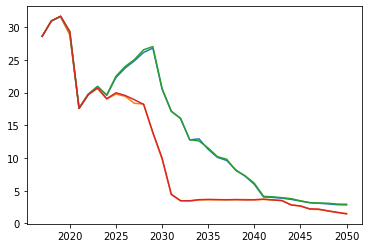

In [30]:
#NEW FILE
for m in [0, 201, 402, 603]:
    df_now = df_cur[df_cur["master_id"] == m].sort_values(by = ["year"])
    
    x = np.array(df_now["year"])
    y = np.array(df_now["el-emissions_total-mtco2e"])
    
    plt.plot(x, y)

plt.show()
    
    

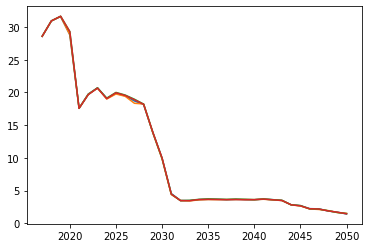

In [31]:
#OLD FILE
for m in [0, 201, 402, 603]:
    df_now = df_cur0[df_cur0["master_id"] == m].sort_values(by = ["year"])
    
    x = np.array(df_now["year"])
    y = np.array(df_now["el-emissions_total-mtco2e"])
    
    plt.plot(x, y)

plt.show()

In [384]:
arch = "Chile_sector_package_2021_03_11_futures-1000"
#get dataframes
df_ts = sr.get_archive_run(sr.fp_csv_attribute_time_series, arch)
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
df_fut = sr.get_archive_run(sr.fp_csv_attribute_future, arch)
df_pmr = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch)
df_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch)
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch)
df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch)
df_params = sr.get_archive_run(sr.fp_csv_parameter_ranges, arch)
df_gams_dem = sr.get_archive_run(sr.fp_csv_gams_data_demanda_electrica_escenarios, arch)


File 'attribute_time_series.csv' not found in '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_11_futures-1000'.
File 'attribute_future.csv' not found in '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_11_futures-1000'.
File 'output_multi_sector_pmr.csv' not found in '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_11_futures-1000'.
File 'parameter_ranges.csv' not found in '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_11_futures-1000'.


In [392]:
df_gams_dem

Escenario     Barra  Agno  Etapa  Bloque      Demanda
0                0   SEN_SIC  2015      1       1          NaN
1                0   SEN_SIC  2015      1       2          NaN
2                0   SEN_SIC  2015      1       3          NaN
3                0   SEN_SIC  2015      1       4          NaN
4                0   SEN_SIC  2015      1       5          NaN
...            ...       ...   ...    ...     ...          ...
4328635       1001  SEN_SING  2050     12       1  8417.949805
4328636       1001  SEN_SING  2050     12       2  8511.482581
4328637       1001  SEN_SING  2050     12       3  8053.171981
4328638       1001  SEN_SING  2050     12       4  7856.753152
4328639       1001  SEN_SING  2050     12       5  7856.753152

[4328640 rows x 6 columns]

In [363]:
arch1 = "Chile_sector_package_2021_03_09_excursion"
df_gams_dem1 = sr.get_archive_run(sr.fp_csv_gams_data_demanda_electrica_escenarios, arch1)
df_gams_dem1

Escenario     Barra  Agno  Etapa  Bloque      Demanda
0               0   SEN_SIC  2015      1       1          NaN
1               0   SEN_SIC  2015      1       2          NaN
2               0   SEN_SIC  2015      1       3          NaN
3               0   SEN_SIC  2015      1       4          NaN
4               0   SEN_SIC  2015      1       5          NaN
...           ...       ...   ...    ...     ...          ...
656635        151  SEN_SING  2050     12       1  8136.987722
656636        151  SEN_SING  2050     12       2  8227.398697
656637        151  SEN_SING  2050     12       3  7784.384921
656638        151  SEN_SING  2050     12       4  7594.521874
656639        151  SEN_SING  2050     12       5  7594.521874

[656640 rows x 6 columns]

In [196]:
arch = "Chile_sector_package_2021_03_09_excursion"
#get dataframes
df_ts = sr.get_archive_run(sr.fp_csv_attribute_time_series, arch)
df_mas = sr.get_archive_run(sr.fp_csv_attribute_master, arch)
df_fut = sr.get_archive_run(sr.fp_csv_attribute_future, arch)
df_pmr = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch)
df_py = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch)
df_an = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch)
df_ed = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch)
df_params = sr.get_archive_run(sr.fp_csv_parameter_ranges, arch)


futs_affect = set(range(11, 18))
mas_affect = set(df_mas[df_mas["future_id"].isin(futs_affect) & df_mas["time_series_id"].isin([0])]["master_id"])
mas_noaffect = set(df_mas[~df_mas["future_id"].isin(futs_affect) & df_mas["time_series_id"].isin([0])]["master_id"])


df_pmr[df_pmr["master_id"].isin(mas_affect) & df_pmr["year"].isin([2050])]



File 'parameter_ranges.csv' not found in '/Users/jsyme/Documents/Projects/FY20/SWCHE102-1000/git/MultiSector_LTS_Chile/archive_runs/Chile_sector_package_2021_03_09_excursion'.


master_id  year  el-emissions_total-mtco2e  \
407         11  2050                       1.43   
441         12  2050                       2.77   
475         13  2050                       2.83   
509         14  2050                       2.83   
543         15  2050                       2.84   
577         16  2050                       2.81   
611         17  2050                       2.81   

     el-costs_total_capex-UNITSHERE  el-costs_total_opex-UNITSHERE  
407                         5078.74                        1725.16  
441                         3505.59                        1890.90  
475                         4190.70                        1968.16  
509                         4202.48                        1968.13  
543                         4209.75                        1970.07  
577                         4174.38                        1964.68  
611                         4139.34                        1962.36

In [229]:
df_mas[df_mas["future_id"] == 0]

master_id  design_id  time_series_id  run_id  strategy_id  future_id
0            0          0               0       0            1          0
19          19          0               1       0            1          0
38          38          0               2       0            1          0
57          57          0               3       0            1          0
76          76          0               4       0            1          0
95          95          0               5       0            1          0
114        114          0               6       0            1          0
133        133          0               7       0            1          0

In [233]:
df_disp = df_py[df_py["year"].isin(range(2050, 2051)) & df_py["master_id"].isin([38, 55])][["master_id"] + [x for x in df_py.columns if (x[0:3] == "tx-")]]
fields_drop = [x for x in df_disp.columns if ("emissions" in x) or (x == "year")]

for field in df_disp.columns:
    if len(set(df_disp[field])) == 1:
        print("dropping %s"%(field))
        fields_drop.append(field)
fields_drop = [x for x in fields_drop if (x != "master_id")]

df_disp = df_disp[[x for x in df_disp.columns if x not in fields_drop]]
dict_agg = {"master_id": "first"}
for field in df_disp.columns:
    if field not in list(dict_agg.keys()):
        dict_agg.update({field: "sum"})

df_disp = df_disp.groupby(by = ["master_id"]).aggregate(dict_agg).reset_index(drop = True)



dropping tx-CAPEX_transport_aviation-MMUSD
dropping tx-CAPEX_transport_bus-MMUSD
dropping tx-CAPEX_transport_taxi-MMUSD
dropping tx-CAPEX_transport_truck-MMUSD
dropping tx-OPEX_transport_aviation-MMUSD
dropping tx-OPEX_transport_bus-MMUSD
dropping tx-OPEX_transport_taxi-MMUSD
dropping tx-OPEX_transport_truck-MMUSD
dropping tx-electricity_hydrogen-gwh
dropping tx-emissions_aviation-mtco2e
dropping tx-emissions_bus-mtco2e
dropping tx-emissions_maritime-mtco2e
dropping tx-emissions_taxi-mtco2e
dropping tx-emissions_train-mtco2e
dropping tx-emissions_truck-mtco2e


In [234]:
df_disp

master_id  tx-CAPEX-MMUSD  tx-CAPEX_transport_private-MMUSD  \
0         38    12094.351690                       9701.373722   
1         55    11915.250272                       9517.389706   

   tx-CAPEX_transport_private_modal_change-MMUSD  tx-OPEX-MMUSD  \
0                                     191.894711   14149.485842   
1                                     196.777309   14085.838455   

   tx-OPEX_transport_private-MMUSD  tx-electricity_total_demand-gwh  
0                      6515.524332                     80092.979081  
1                      6451.876946                     80037.309383

In [158]:
dict_traj_params = {}
set_all_tg_to_examine = set({})
for tg in [1, 8, 9]:
    s = set([sr.clean_trajgroup_names(x)["param"] for x in list(df_params["parameter"]) if (("trajgroup_" + str(tg)) in x) and ("lhs" not in x)])
    dict_traj_params.update({tg: s})
    set_all_tg_to_examine = set_all_tg_to_examine | s
fields = ["residential_retrofit_house"] + [x for x in df_ed.columns if (x in set_all_tg_to_examine)]
fields = fields + [x for x in df_ed.columns if ("modal_split" in x)]


In [175]:
def disp(df_in, df_mas):
    fields_emit = [x for x in df_in.columns if ("emissions_total" in x)]
    set_view = set(df_mas[(df_mas["future_id"] == 0) & df_mas["time_series_id"].isin([0, 1]) & df_mas["strategy_id"].isin([0, 1])]["master_id"])
    df_ret = df_in[df_in["master_id"].isin(set_view) & df_in["year"].isin([2015, 2050])][["master_id", "year"] + fields_emit]
    df_ret = df_ret.sort_values(by = ["master_id", "year"]).reset_index(drop = True)
    
    return df_ret


disp(df_pmr, df_mas)
    
    

master_id  year  el-emissions_total-mtco2e
0          0  2050                       1.43
1         18  2050                       1.48

In [178]:
df_disp = disp(df_pmr_comp, df_mas_comp)
df_disp[df_disp["master_id"].isin([0, 201, 402, 603])]


master_id  year  el-emissions_total-mtco2e
0          0  2050                       2.83
1        201  2050                       1.52
2        402  2050                       2.93
3        603  2050                       1.45

#### arch_comp = "Chile_sector_package_2021_02_20_design_id-1"
#get dataframes
df_mas_comp = sr.get_archive_run(sr.fp_csv_attribute_master, arch_comp)
#df_fut_comp = sr.get_archive_run(sr.fp_csv_attribute_future, arch_comp)
df_pmr_comp = sr.get_archive_run(sr.fp_csv_output_multi_sector_pmr, arch_comp)
df_py_comp = sr.get_archive_run(sr.fp_csv_output_multi_sector, arch_comp)
df_an_comp = sr.get_archive_run(sr.fp_csv_output_multi_sector_analytica, arch_comp)
df_ed_comp = sr.get_archive_run(sr.fp_csv_experimental_design_msec, arch_comp)
df_params_comp = sr.get_archive_run(sr.fp_csv_parameter_ranges, arch_comp)




In [160]:
df_ed[df_ed["year"].isin([2050]) & df_ed["master_id"].isin(set({0, 18}))][["master_id"] + fields]


master_id  residential_retrofit_house  copper_heat_diesel  \
35           0                1.300148e+06            0.283003   
683         18                1.300148e+06            0.283003   

     copper_heat_solar  steel_heat_biomass  steel_heat_coal  steel_heat_coke  \
35            0.139974                 0.0         0.590901         0.399395   
683           0.139974                 0.0         0.590901         0.399395   

     steel_heat_hydrogen  transport_frac_aviation_hydrogen  \
35                   0.0                               0.0   
683                  0.0                               0.0   

     transport_frac_aviation_kerosene  \
35                                1.0   
683                               1.0   

     transport_investment_cost_modal_split_private_to_bus  \
35                                                 0.8      
683                                                0.8      

     transport_investment_cost_modal_split_private_to_cycling  \
35                                                0.08          
683                                               0.08          

     transport_investment_cost_modal_split_private_to_telework  \
35                                                 0.0           
683                                                0.0           

     transport_investment_cost_modal_split_private_to_train  \
35                                                 8.0        
683                                                8.0        

     transport_modal_split_private_to_bus  \
35                                 0.0011   
683                                0.0011   

     transport_modal_split_private_to_cycling  \
35                                     0.0011   
683                                    0.0011   

     transport_modal_split_private_to_taxi  \
35                                0.026857   
683                               0.026857   

     transport_modal_split_private_to_telework  
35                                      0.0011  
683                                     0.0011

In [162]:
df_ed_comp[df_ed_comp["year"].isin([2050]) & df_ed_comp["master_id"].isin(set({0, 201}))][["master_id"] + fields]


master_id  residential_retrofit_house  copper_heat_diesel  \
35             0                1.300148e+06            0.283003   
14507        201                6.197750e+06            0.123029   

       copper_heat_solar  steel_heat_biomass  steel_heat_coal  \
35              0.139974        0.000000e+00         0.590901   
14507           0.300000        9.972813e-07         0.590900   

       steel_heat_coke  steel_heat_hydrogen  transport_frac_aviation_hydrogen  \
35            0.399395         0.000000e+00                               0.0   
14507         0.399394         9.972813e-07                               0.1   

       transport_frac_aviation_kerosene  \
35                                  1.0   
14507                               0.9   

       transport_investment_cost_modal_split_private_to_bus  \
35                                                   0.8      
14507                                                0.8      

       transport_investment_cost_modal_split_private_to_cycling  \
35                                                  0.08          
14507                                               0.08          

       transport_investment_cost_modal_split_private_to_telework  \
35                                                   0.0           
14507                                                0.0           

       transport_investment_cost_modal_split_private_to_train  \
35                                                   8.0        
14507                                                8.0        

       transport_modal_split_private_to_bus  \
35                                   0.0011   
14507                                0.1000   

       transport_modal_split_private_to_cycling  \
35                                       0.0011   
14507                                    0.1000   

       transport_modal_split_private_to_taxi  \
35                                  0.026857   
14507                               0.026857   

       transport_modal_split_private_to_telework  
35                                        0.0011  
14507                                     0.1000

field: TotalDiscountedCost
WATER:
LAND:
field: DiscountedCapitalInvestment
WATER:
LAND:
field: DiscountedOperatingCost
WATER:
LAND:








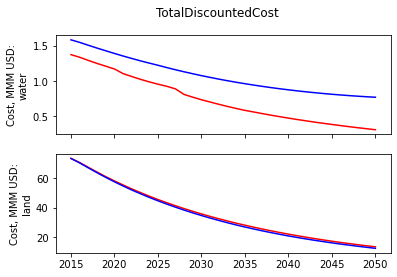

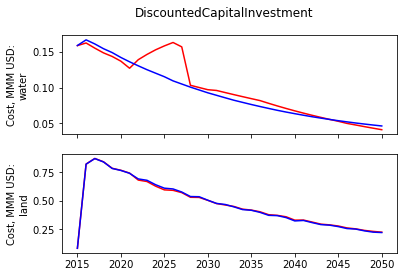

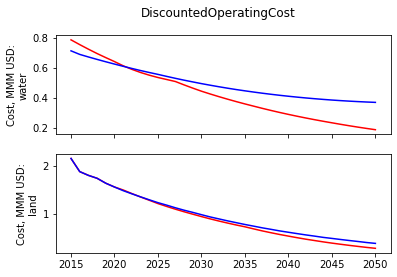